(app:ch13:lse)=
# Finding singular vectors With singular value decomposition

In this section, we'll do a more thorough overview of the `svd` as it relates to the Laplacian Spectral Embedding, or `LSE`, that you learned about in {numref}`ch6:spectral`. Let's start off by just obtaining a simulation with $20$ nodes:

In [184]:
from graspologic.simulations import sbm

ns = [10, 10]
# Make network
B = np.array([[0.8, 0.1], 
              [0.1, 0.8]])
A, zs = sbm(n=ns, p=B, return_labels=True)
zs = zs + 1  # to make 1s and 2s instead of 0s and 1s

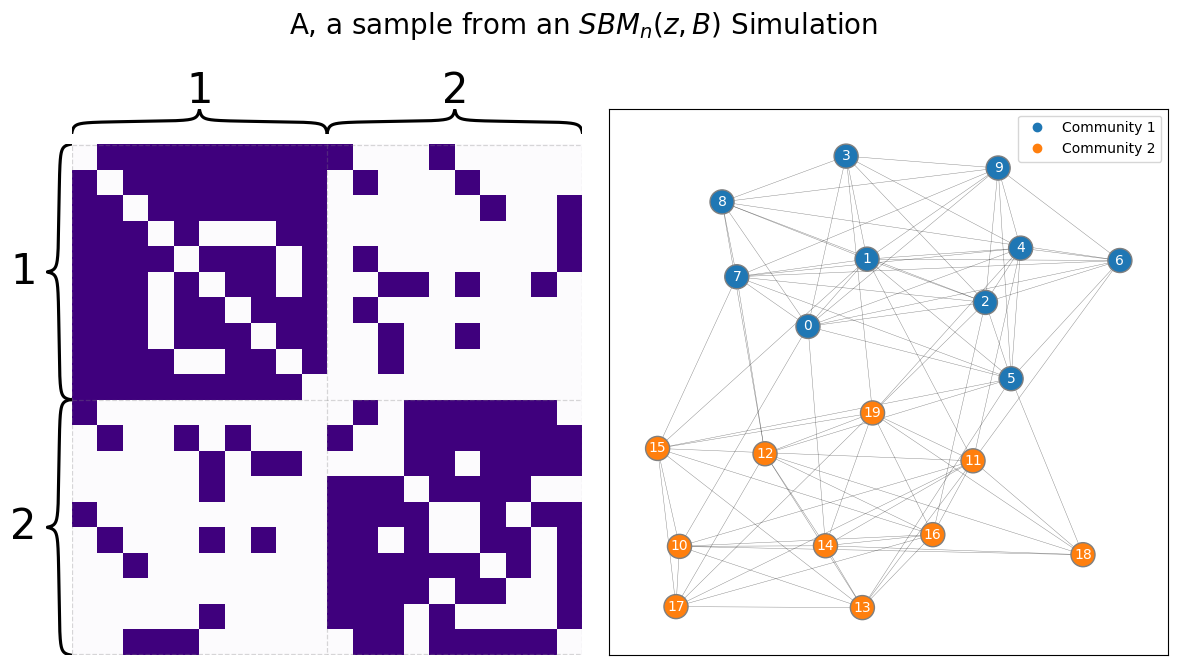

In [185]:
from graphbook_code import draw_multiplot
draw_multiplot(A, labels=zs, title="A, a sample from an $SBM_n(z, B)$ Simulation");

The `svd` is a way to decompose a matrix into three distinct new matrices -- in our case, the matrix will be the Laplacian we just built. These three new matrices correspond to the singular vectors and singular values of the original matrix: the algorithm will collect all of the singular vectors as columns of one matrix, and the singular values as the diagonals of another matrix.

````{definition} Singular-Value Decomposition (svd) of a real, square matrix
:label: app:lse:svd
The singular value decomposition of a matrix $X$ whose entries are all real with $n$ rows and $n$ columns is a set of matrices $U, \Sigma$, and $V$, where:
\begin{align*}
    X &= U\Sigma V^\top
\end{align*}
where $U$, $\Sigma$, and $V$ have some special properties:
1. The left singular vectors: the columns $\vec u_i$ of $U$ are called the left singular vectors of $X$. If $X$ has $n$ rows and $n$ columns, there will be $n$ left singular vectors. This matrix looks like this:
\begin{align*}
    U &= \begin{bmatrix}
        \uparrow & & \uparrow \\
        \vec u_1 & ... & \vec u_n \\
        \downarrow & & \downarrow
    \end{bmatrix}
\end{align*}
$U$ is also orthonormal, which you will learn more about [later in this Chapter](#link?). What you need to know about *orthonormality* for now is that this means that none of the columns of $U$ can be expressed as sums of other columns of $U$, or their multiples. We will bring this fact up again later when it comes up.

2. The singular values: the matrix $\Sigma$ is a diagonal matrix, which means that it has entries along the diagonal and all the other entries are just *zero*. There will be $n$ total of these. This matrix looks something like this:
\begin{align*}
    \Sigma &= \begin{bmatrix}
        \sigma_1 & 0 & ... & 0 \\
        0 & \sigma_2 & \ddots & \vdots \\
        \vdots & \ddots & \ddots & 0 \\
        0 & ... & 0 & \sigma_n
    \end{bmatrix}
\end{align*}
The special property is that by definition, the singular values are *descending*, in that $\sigma_1 \geq \sigma_2$, $\sigma_2 \geq \sigma_3$, so on and so forth to $\sigma_n$. The singular values are by definition *positive*.

3. The right singular vectors: the columns $\vec v_i$ of $V$ are called the right singular vectors of $X$. If $X$ has $n$ rows and $n$ columns, there will be $n$ right singular vectors. This matrix looks like this:
\begin{align*}
V &= \begin{bmatrix}
        \uparrow & & \uparrow \\
    \vec v_1 & ... & \vec v_n \\
        \downarrow & & \downarrow
\end{bmatrix}
\end{align*}

$V$ is also orthonormal.

These singular values/vectors satisfy the relationship:
\begin{align*}
    X \vec v_i = \sigma_i \vec u_i.
\end{align*}
````
This is pretty similar to another linear algebra concept that will come in handy, called the eigendecomposition. If you remember from linear algebra, the eigenvalue decomposition was the decomposition:

````{definition} Eigendecomposition of a real, square matrix
:label: app:lse:svd
The eigendecomposition of a matrix $X$ whose entries are all real with $n$ rows and $n$ columns is a set of matrices $Q$ and $\Lambda$, where:
\begin{align*}
    X &= Q\Lambda Q^\top
\end{align*}
where $Q$ is the matrix whose columns $\vec q_i$ are the eigenvectors of $X$ and $\Lambda$ is the diagonal matrix whose diagonal entries $\lambda_i$ are the eigenvalues of $X$. The eigenvalues and eigenvectors satisfy the relationship:
\begin{align*}
    X\vec q_i = \lambda_i \vec q_i.
\end{align*}
````
Unlike the eigendecomposition, which does not *necessarily* exist for a square matrix $X$, the singular value decomposition *always* exists. 

#### Applying the svd to the Laplacian

For the Laplacian Spectral Embedding, the reason that we care about this was discussed in {numref}`ch6:spectral`, the spectral embedding. Let's take the Laplacian and show its `svd`:

In [199]:
import numpy as np
from graspologic.utils import to_laplacian

L = to_laplacian(A, form="DAD")
U, s, Vt = np.linalg.svd(L, hermitian=True)

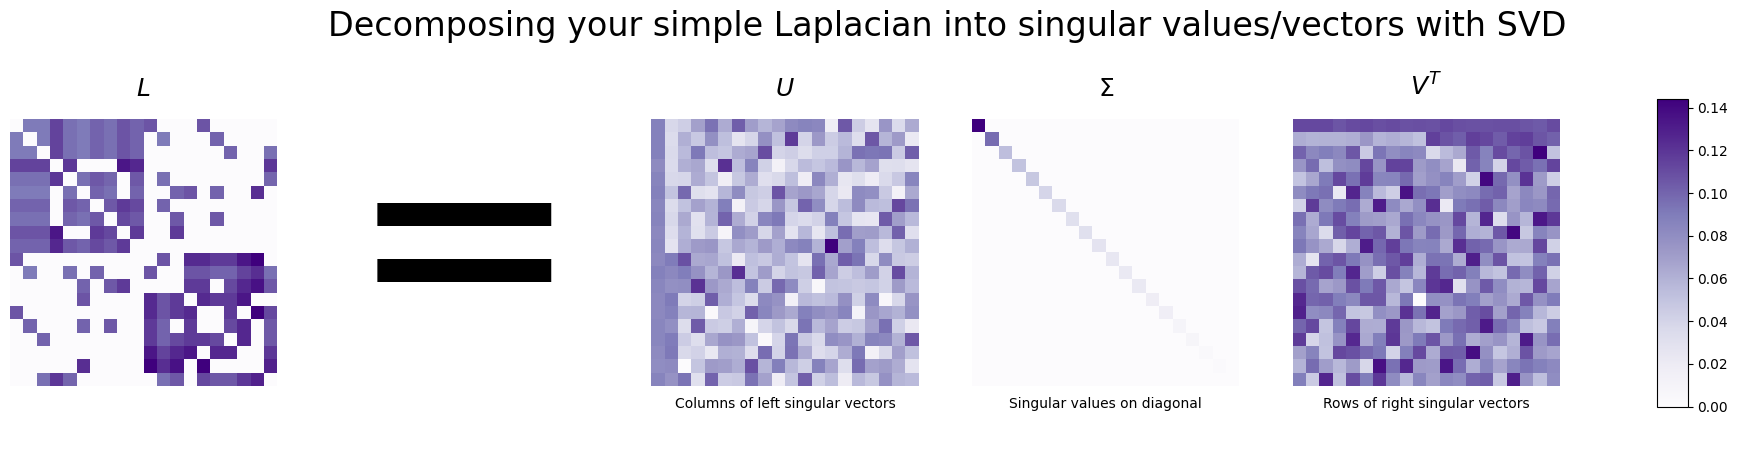

In [200]:
import matplotlib.pyplot as plt
from graphbook_code import heatmap
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib import cm
from graphbook_code import GraphColormap

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

# First axis (Laplacian)
heatmap(L, ax=axs[0], cbar=False, title="$L$")

# Second axis (=)
axs[1].text(x=.5, y=.5, s="=", fontsize=200, 
            va='center', ha='center')
axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
sns.despine(ax=axs[1], left=True, bottom=True)

# Third axis (U)
U_ax = heatmap(U, ax=axs[2], cbar=False, title="$U$")
U_ax.set_xlabel("Columns of left singular vectors")

# Third axis (s)
E_ax = heatmap(np.diag(s), ax=axs[3], cbar=False, title="$\Sigma$")
E_ax.set_xlabel("Singular values on diagonal")

# Fourth axis (V^T)
Ut_ax = heatmap(Vt, ax=axs[4], cbar=False, title="$V^T$")
Ut_ax.set_xlabel("Rows of right singular vectors")

# Colorbar
vmin, vmax = np.array(L).min(), np.array(L).max()
norm = Normalize(vmin=vmin, vmax=vmax)
im = cm.ScalarMappable(cmap=GraphColormap("sequential").color, norm=norm)
fig.colorbar(im, ax=axs, shrink=0.8, aspect=10);

fig.suptitle("Decomposing your simple Laplacian into singular values/vectors with SVD", fontsize=24);

## The `svd` as a sum of rank-1 matrices

This expression $heatmap U\Sigma V^\top$ is a little bit complicated, so we will simplify it down a little bit here: as it turns out, this "complicated" looking matrix multiplication is actually pretty straightforward because $\Sigma$ is diagonal. You can write this equation down like this, which is much more understandable:

\begin{align*}
    X &= \sum_{i = 1}^n \sigma_i \vec u_i \vec v_i^\top = \sum_{i = 1}^n \sigma_i\begin{bmatrix}
        \uparrow \\ \vec u_i \\ \downarrow
    \end{bmatrix}\begin{bmatrix}
        \leftarrow & \vec v_i^\top & \rightarrow
    \end{bmatrix}
\end{align*}

Let's try to interpret what this intimidating sum really is saying to us. To start with, for each term, you have the left singular vector, $\vec u_i$. By matrix multiplication, taking the product of $\vec u_i$ with $\vec v_i^\top$ gives you this:
\begin{align*}
    \vec u_i \vec v_i^\top &= \begin{bmatrix}
    \uparrow &  & \uparrow \\
    v_{i1}\vec u_i & ... & v_{in}\vec u_i \\
    \downarrow &  & \downarrow
    \end{bmatrix}
\end{align*}
So basically, you have a matrix with $n$ columns, all of which are multiples of the vector $\vec u_i$. What multiple? Well, that is what $\vec v_i$ tells us: the "amount" of $\vec u_i$ in a particular column $j$ is indicated by $v_{ij}$. This gives you a matrix, $\vec u_i\vec v_i^\top$, which *also* has $n$ rows and $n$ columns, where every column is a multiple of $\vec u_i$. This introduces you to our next important property: *matrix rank*.

````{definition} Matrix rank
:label: app:mtx_rank
The *rank* of a matrix is a description of just how complicated the matrix is. A matrix is **low rank** if any of its rows (or equivalently, its columns) are linear combinations of other rows (or columns). What this means is that if you can take rows or columns from the matrix, and add or multiply them together to get other rows or columns from the matrix, the matrix is low rank. This means that information contained in the matrix is redundant, in that you could obtain it by just adding or subtracting other information already contained in the matrix if you had instructions as to how to properly combine that information.
````

Since every column of $\vec u_i \vec v_i^\top$ is a multiple of $\vec u_i$, it's pretty clear that the resulting matrix $\vec u_i \vec v_i^\top$ is low rank (it is rank $1$, since each column is a multiple of the column $\vec u_i$). Finally, you just take this $n$ row and $n$ column matrix, and you multiply the whole thing by $\sigma_i$. So as it turns out, $X$ is equal to a weighted sum of rank-$1$ matrices, where the weights are all given to you by the singular values:
\begin{align*}
X &= \sum_{i = 1}^n \sigma_i \vec u_i \vec v_i^\top = \sigma_1\begin{bmatrix}
        \uparrow \\ \vec u_1 \\ \downarrow
    \end{bmatrix}\begin{bmatrix}
        \leftarrow & \vec v_1^\top & \rightarrow
    \end{bmatrix} + ... + \sigma_n\begin{bmatrix}
        \uparrow \\ \vec u_n \\ \downarrow
    \end{bmatrix}\begin{bmatrix}
        \leftarrow & \vec v_n^\top & \rightarrow
    \end{bmatrix}
\end{align*}

### The Laplacian as a sum of rank $1$ matrices
Let's express this operation using the Laplacian, by looking at the first six rank-1 matrices, and looking at the sum of all of the rank-1 matrices:

In [201]:
n_nodes = L.shape[0]
low_rank_matrices = []
for i in range(0, 20):
    low_rank_matrices.append(s[i]*np.array(U[:,[i]]) @ np.array(Vt[[i],:]))
Lsum = np.sum(low_rank_matrices, axis=0)

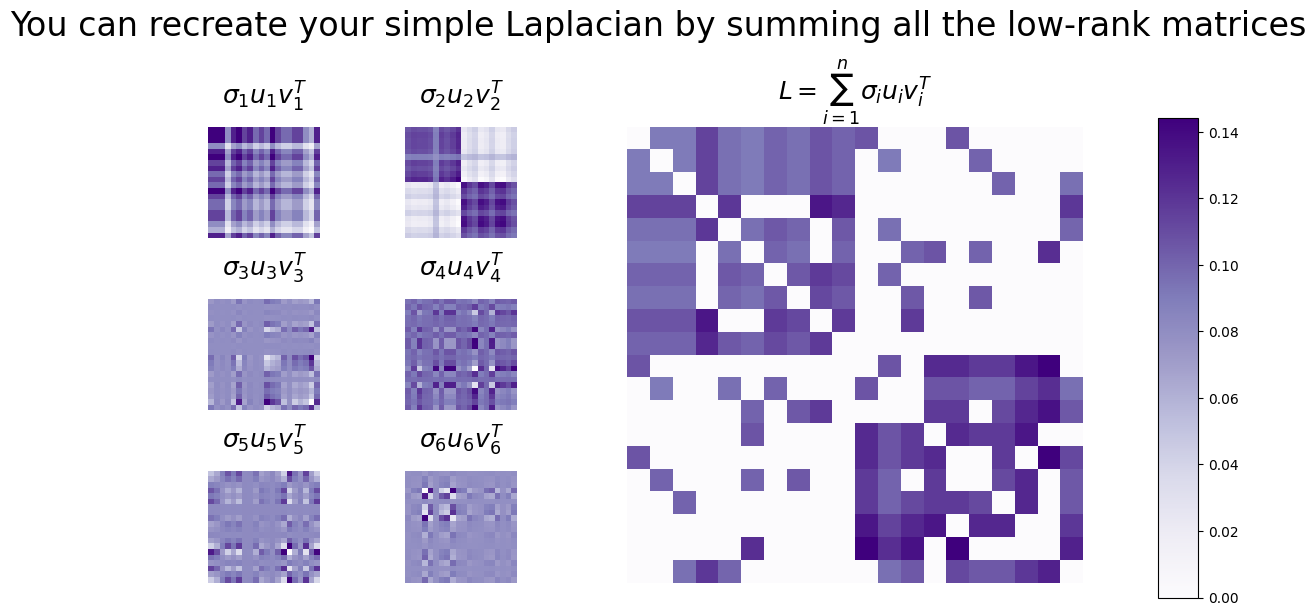

In [202]:
from matplotlib.gridspec import GridSpec
import warnings

fig = plt.figure(figsize=(10, 6))
gs = GridSpec(3, 5)
ax_laplacian = fig.add_subplot(gs[:, 2:])

# Plot low-rank matrices
i = 0
for row in range(3):
    for col in range(2):
        ax = fig.add_subplot(gs[row, col])
        title = f"$\sigma_{i+1} u_{i+1} v_{i+1}^T$"
        heatmap(low_rank_matrices[i], ax=ax, cbar=False, title=title)
        i += 1
        
# Plot Laplacian
heatmap(Lsum, ax=ax_laplacian, cbar=False, title="$L = \sum_{i = 1}^n \sigma_i u_i v_i^T$")

# # Colorbar
cax = fig.add_axes([1, 0, .04, .8])
vmin, vmax = np.array(Lsum).min(), np.array(Lsum).max()
norm = Normalize(vmin=vmin, vmax=vmax)
im = cm.ScalarMappable(cmap=GraphColormap("sequential").color, norm=norm)
fig.colorbar(im, cax=cax, use_gridspec=False);


fig.suptitle("You can recreate your simple Laplacian by summing all the low-rank matrices", fontsize=24)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.tight_layout();

## Critical Properties of the `svd`

To get a little deeper in the weeds, we're also going to repeatedly make use of a property of the Singular Value Decomposition that will be very handy for this section and the next section:

```{property} Left/Right Singular Vectors and eigenvectors
:label: app:lse:leftright_eq
If the matrix $X$ is real and symmetric, then its singular vectors (left or right) form a set of eigenvectors for $X$.
```

For more technical and generalized details on how `svd` works, or for explicit proofs, we would recommend a Linear Algebra textbook such as {numref}`Axler` or {numref}`Trefethen1997`. We'll look at the `svd` with a bit more detail here in the specific case where you start with a matrix which is square, symmetric, and has real singular values. You can see this fact by noting that if $X$ is symmetric with the eigendecomposition $(Q, \Lambda)$, then:
\begin{align*}
    X = Q\Lambda Q^\top &= \sum_{i = 1}^n \vec q_i \lambda_i \vec q_i^\top =  \sum_{i = 1}^n \vec q_i |\lambda_i|\sign(\lambda_i) \vec q_i^\top.
\end{align*}
This looks really similar to the equation we saw above for the singular value decomposition, and in fact it shows us something really interesting: a singular value decomposition *almost* gives us an eigendecomposition of $X$. If we were to take the left singular vectors $\vec u_i = \vec q_i$, the singular values $|\lambda_i|$, and the right singular vectors $\vec v_i = \sign(\lambda_i) \vec q_i$, we have a singular value decomposition of $X$. Likewise, (somewhat more interestingly), if we have a singular value decomposition of $X$ as $(U, \Sigma, V)$, then the columns of $U$ are also eigenvectors of $X$. 

### The symmetric Laplacian left/right singular vector equivalence

Next, we'll see that the left and right singular vectors are equivalent for the Laplacian of the diagonally-augmented adjacency matrix for the non-zero singular values (which in this case, is all of them, as $L$ is *positive definite*). We take a look at the columns of $U$ and $V$, as well as their difference. We will quantify the difference between the first four columns of $U$ and $V$ using the *Frobenius norm* of the difference between them. This quantity, abbreviated $||U - V||_F$, has a value greater than $0$ if the two matrices have any entries not in common:

In [198]:
diff = np.linalg.norm(U - Vt.transpose())
print(np.linalg.eigvals(L))
print(s)

[ 1.          0.67458987  0.21337895  0.18851716  0.15410462  0.11674234
 -0.37030786 -0.35020252 -0.32866122 -0.2711415  -0.24919356 -0.21174216
 -0.16502093 -0.15438362 -0.12292021  0.02157577  0.00729992 -0.02987015
 -0.06635255 -0.05641237]
[1.         0.67458987 0.37030786 0.35020252 0.32866122 0.2711415
 0.24919356 0.21337895 0.21174216 0.18851716 0.16502093 0.15438362
 0.15410462 0.12292021 0.11674234 0.06635255 0.05641237 0.02987015
 0.02157577 0.00729992]


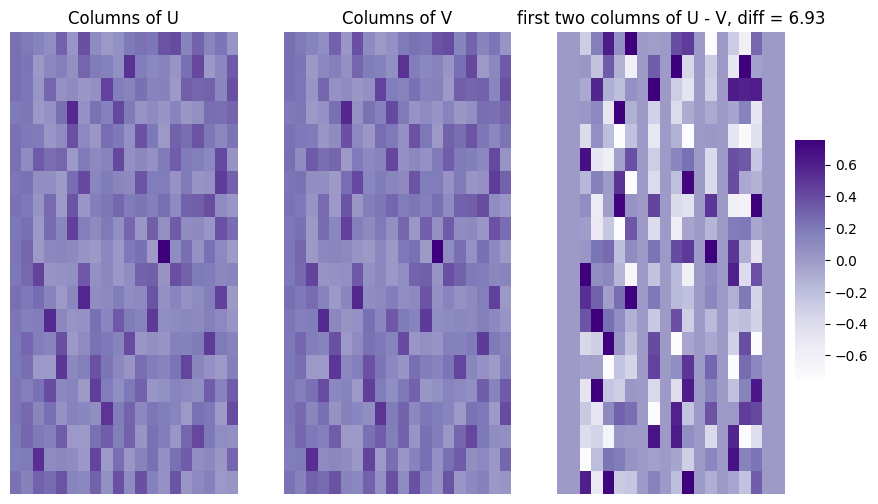

In [196]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))

cbar_ax = fig.add_axes([.91, .3, .03, .4])
vmin, vmax = np.min(np.hstack([U, Vt])), np.max(np.hstack([U, Vt]))

mtxs = [np.abs(U), np.abs(Vt).transpose(), U - Vt.transpose()]
title = ["Columns of U", "Columns of V", "first two columns of U - V, diff = {:.2f}".format(diff)]
for i, ax in enumerate(axs.flat):
    sns.heatmap(mtxs[i], cbar=i == 0, vmin=vmin, vmax=vmax, ax=ax,
           cbar_ax = None if i else cbar_ax, cmap=GraphColormap("sequential").color)
    ax.set_title(title[i])
    ax.set_xticks([]); ax.set_yticks([])

### You can approximate your symmetric Laplacian by only summing a few of the low-rank matrices

Your expression has simplified down a little bit, but we aren't quite finished. If the Laplacian $L$ has the singular value decomposition with matrix $U$, $\Sigma$, and $V$, then you could express $L$ as:

\begin{align*}
    L &= \sum_{i = 1}^n \sigma_i \vec u_i \vec v_i^\top
\end{align*}
But wait, we know that some of these singular vectors are just redundant: their singular value is zero! And for all of the other left and right singular vectors, you knew that the corresponding singular vectors were exactly equivalent So this means that, if the first $K$ singular values are non-zero, that:
\begin{align*}
    L &= \sum_{i = 1}^K \sigma_i\vec u_i \vec u_i^\top
\end{align*}
For each term in this sum, remember we said that you had a rank $1$ matrix whose columns are multiples of $\vec u_i$ (where the exact multiplicative factor was given by $\vec v_i$, but now is also given by $\vec u_i$ since $\vec u_i = \vec v_i$ for these vectors with non-zero singular values) weighted by $\sigma_i$. What do we mean by *weighted* here?

To better understand this term, we'll use a few facts. Remember that we said that the Laplacian had positive singular values, which means that their sum, $s = \sum_{i = 1}^n \sigma_i$, is also positive. Let's rewrite your expression a tiny bit:
\begin{align*}
    L &= \sum_{i = 1}^K s\frac{\sigma_i}{s}\vec u_i \vec v_i^\top \\
    &= s\sum_{i = 1}^K \frac{\sigma_i}{s}\vec u_i \vec v_i^\top
\end{align*}
All we have done here is used the fact that $\frac{s}{s} = 1$, so we basically just *pulled out* a term of $s$ from every element.

Now we can start to understand this expression a little bit better. Notice that since the singular values are positive, that the term $\frac{\sigma_i}{s}$ is going to be a fraction for every singular value/vector (it will be between $0$ and $1$). To take it a step further, the sum of all of these terms will, in fact, be $1$! That is:
\begin{align*}
    \sum_{i = 1}^K \frac{\sigma_i}{s} = 1
\end{align*}
This is because you could pull out the common factor $\frac{1}{s} = \frac{1}{\sum_{i = 1}^n \sigma_i}$ from every element of the sum, and then you are just left with:
\begin{align*}
    \frac{1}{\sum_{i = 1}^K \sigma_i}\sum_{i = 1}^n \sigma_i = 1
\end{align*} 
So in a sense, the quantity $\frac{\sigma_i}{s}$ tells you the *fraction* of $L$ that is *explained* by $\vec u_i \vec u_i^\top$. This quantity represents how much of $\vec u_i \vec u_i^\top$ you need to include in order to obtain $L$. But there's another fun fact: remember that the singular values were all ordered in *decreasing* order! This meant that $\sigma_1 \geq \sigma_2 \geq ... \geq \sigma_K$. So, if you just add $\frac{1}{s}$ to each of these, since $s$ is positive, $\frac{1}{s}$ will be too, and consequently, $\frac{\sigma_1}{s} \geq \frac{\sigma_2}{s} \geq ... \geq \frac{\sigma_K}{s}$!

What this means is that to describe $L$, you need *more* of the first few singular vectors than you do of the later singular vectors. These singular vectors will comprise a bigger *fraction* of $L$ than the others.

Logically, if you wanted to take $L$ and form a *best* representation with only a single rank-$1$ matrix, wouldn't it make a lot of sense to take the rank-$1$ matrix which was the largest fraction of $L$? And if you wanted to take $L$ and form the *best* representation with a rank-$2$ matrix, what could you do there? 

You will remember we brought up a fact about $U$: it was orthonormal, which meant that the columns $\vec u_i$ were not sums of other columns nor their multiples. This means that to understand a sum of any two different rank-$1$ matrices $\sigma_i\vec u_i\vec u_i^\top$ and $\sigma_j\vec u_j\vec u_j^\top$ for some combination $i$ and $j$ that make up $L$ be rank-$2$: you cannot express $\vec u_i$ as a multiple of $\vec u_j$, and vice-versa. 

So then to get the best rank-$2$ representation of $L$, wouldn't it make sense for you to take the two rank-$1$ matrices that were the largest and second largest fraction of $L$? We think so too! This pattern, coupled with the orthonormality of $U$, gives you that $L_d$ is a rank-$d$ representation of $L$ as long as the singular values are non-zero.

As it turns out, for a Laplacian, the best rank-$d$ representation is the quantity:
\begin{align*}
    L_d &= \sum_{i = 1}^d \sigma_i \vec u_i \vec u_i^\top
\end{align*}
When we say best here, we mean the representation where the Frobenius norm of the difference (there's that term again!) $||L - L_d||_F$ is at a minimum. This result holds true for *any* svd of a matrix:


This concept of matrix rank allows us to capture an extremely useful property of the SVD: the first $d$ entries of each of the matrices $U$, $\Sigma$, and $V$ will give us the best rank-$d$ approximation of our original matrix:

````{property} SVD best low-rank approximation
:label: app:lse:svd_best
If $X$ is an $n \times n$ real matrix with the svd $X = U\Sigma V^\top$, then a rank-$d$ approximation of $X$, $X_d$, denoted:
```{math}
    X_d = \sum_{i = 1}^d \sigma_i \vec u_i \vec v_i^\top
```
is the best rank-$d$ approximation of $X$; that is, $X_d$ is the rank-$d$ matrix that has the smallest Frobenius distance from $X$.
````

In this sense, $L_d$ is the best rank-$d$ *approximation* of the original matrix $L$. A similar property holds in general for *any* svd, with a lot fewer restrictions than we've placed here (without needing the left and right singular vectors to be equivalent), but this will suffice intuitionally for your purposes that you need going forward. We have the convenient intuition for the case where we are working with a positive semi-definite matrix that each successive rank-$1$ matrix we are adding is a lower and lower *fraction* of $L$, which does not quite hold for the more general case of an svd.

This tells you something interesting about spectral embedding: the information in the first few singular vectors of a high rank matrix lets you find a more simple approximation to it. You can take a matrix that's extremely complicated (high-rank) and project it down to something which is much less complicated (low-rank).

Look below. In each plot, we're summing more and more of these low-rank matrices. By the time we get to the fourth sum, we've totally recreated the original Laplacian, and the remaining terms don't even matter.

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(9,6))

current = np.zeros(L.shape)
for i, ax in enumerate(axs.flat):
    new = low_rank_matrices[i]
    current += new
    heatmap(current, ax=ax, cbar=False, 
            title=f"$\sum_{{i = 1}}^{i+1} \sigma_i u_i u_i^T$")
    
fig.suptitle("Each of these is the sum of an \nincreasing number of low-rank matrices", fontsize=16)
plt.tight_layout()

### Approximating becomes extremely useful when you have a bigger (now regularized) Laplacian

This becomes even more useful when you have huge networks with thousands of nodes, but only a few communities. It turns out, especially in this situation, you can usually sum a very small number of low-rank matrices and get to an excellent approximation for your network that uses much less information.

Take the network below, for example. It's generated from a [stochastic block model](#ch5:sbm) with 50 nodes total (25 in one community, 25 in another):

In [ ]:
from graspologic.simulations import sbm
from graspologic.utils import to_laplacian

# Make network
B = np.array([[0.8, 0.1], 
              [0.1, 0.8]])
n = [25, 25]
Abig, labelsbig = sbm(n=n, p=B, return_labels=True)

You take its [DAD Laplacian](ch4:mtx-rep:dad_laplacian) (remember that this means $L = D^{-1/2} A D^{-1/2}$), decompose it, and sum the first three low-rank matrices that you generated from the singular vector columns.

The result is not exact, but it looks pretty close. And you only needed the information from the first two singular vectors instead of all of the information in your full $n \times n$ matrix!

In [ ]:
# Form new laplacian
Lbig = to_laplacian(Abig)

# decompose
d = 2
Ubig, sbig, _ = svd(Lbig)

Ubigk = Ubig[:,0:d]; Sbigk = np.diag(sbig[0:d])
low_rank_approximation = Ubigk @ Sbigk @ Ubigk.T

In [ ]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
l2_hm = heatmap(Lbig, ax=axs[0], cbar=False, title="$L$")
l2approx_hm = heatmap(low_rank_approximation, ax=axs[1], cbar=False, title="$L_2 = \sum_{{i = 1}}^{2} \sigma_i u_i u_i^T$")

l2_hm.set_xlabel("Full-rank Laplacian for a 50-node matrix", fontdict={'size': 15})
l2approx_hm.set_xlabel("Sum of only two low-rank matrices", fontdict={'size': 15});

fig.suptitle("Summing only two low-rank matrices approximates the normalized Laplacian pretty well!", fontsize=24)

plt.tight_layout()

This is where a lot of the power of an `svd` comes from: you can approximate extremely complicated (high-rank) matrices with extremely simple (low-rank) matrices.

## Using the `svd` to understand the estimated latent position matrix

So, now we've taken your Laplacian $L$, and we've reduced it down to the most important $d$ low-rank matrices. You expressed $L_d$ as:
\begin{align*}
    L_d &= \sum_{i = 1}^d\sigma_i \vec u_i \vec u_i^\top
\end{align*}
To keep the fun going, we're going to back up a step. To do this, we'll introduce two new matrices, $\Sigma_d$ and $U_d$. In this case, $\Sigma_d$ is going to be a $d \times d$ diagonal matrix, whose diagonal entries are the top $d$ singular values of $L$, and $U_d$ is going to be the $n \times d$ matrix whose columns are the corresponding top $d$ singular vectors of $L$. These matrices look like this:
\begin{align*}
    U_d &= \begin{bmatrix}
    \uparrow & & \uparrow \\
    \vec u_1 & ... & \vec u_d \\
    \downarrow & & \downarrow
    \end{bmatrix},\;\;\; \Sigma_d = \begin{bmatrix}
        \sigma_1 & 0 & ... & 0\\
        0 & \sigma_2 & \ddots & \vdots \\
        \vdots & \ddots & \ddots & 0 \\
        0 & ... & 0 & \sigma_d
    \end{bmatrix}
\end{align*}
As it turns out, just like you expressed the product $U\Sigma V^\top$ as a sum, you can do the reverse here, too: you can express the above sum for $L_d$ as a matrix product, by writing that $L_d = U_d \Sigma_d U_d^\top$. Why does this help us?

You know that the singular values for a Laplacian are non-negative, so they all have a square root. This means you could express $\sigma_i$ as the product of $\sqrt{\sigma_i}\sqrt{\sigma_i}$ with itself!

Finally, remember that if you were to multiply two diagonal matrices, the resulting matrix would just be the element-wise product of each diagonal entry. This means you could just write $\Sigma_d$ like this:
\begin{align*}
    \Sigma_d &= \begin{bmatrix}
        \sqrt{\sigma_1} & 0 & ... & 0 \\
        0 & \sqrt{\sigma_2} & \ddots & \vdots \\
        \vdots & \ddots & \ddots & 0 \\
        0 & ... & 0 & \sqrt{\sigma_d}
    \end{bmatrix}\begin{bmatrix}
        \sqrt{\sigma_1} & 0 & ... & 0 \\
        0 & \sqrt{\sigma_2} & \ddots & \vdots \\
        \vdots & \ddots & \ddots & 0 \\
        0 & ... & 0 & \sqrt{\sigma_d}
    \end{bmatrix}
\end{align*}
You will call the resulting matrix the "square root" matrix of $\Sigma_d$, abbreviated $\sqrt{\Sigma_d}$ which hopefully is named for pretty obvious reasons. So, $\Sigma_d = \sqrt{\Sigma_d}\sqrt{\Sigma_d}$. This matrix has $d \times d$ entries, and is therefore square. Also, notice that all the off-diagonal entries are just $0$, which means it's symmetric too, because of the convenient fact that $0 = 0$ (and hence, the off-diagonal entries are all equal). Putting this fact together means that $\sqrt{\Sigma_d} = \sqrt{\Sigma_d}^\top$, which is the definition of matrix symmetry. So finally, $\Sigma_d = \sqrt{\Sigma_d}\sqrt{\Sigma_d}^\top$. This gives you that:
\begin{align*}
    L_d &= U_d \sqrt{\Sigma_d}\sqrt{\Sigma_d}^\top U_d^\top
\end{align*}
Or stated another way, if you call $\hat X_d = U_d \sqrt{\Sigma_d}$, then $L_d = \hat X_d \hat X_d^\top$. This means that the matrix $X_d$ contains *all* of the information you need to describe $L_d$.

Since $\hat X_d$ contains all the information you need to study $L_d$, why wouldn't you just study $\hat X_d$ itself? This is exactly what you do. Because $\hat X_d$ is so important, you give it a special name: you call $\hat X_d$ a rank-$d$ estimate of the **latent positions of the Laplacian**. It looks like this:
\begin{align*}
    \hat X_d &= U_d \sqrt{\Sigma_d} = \begin{bmatrix}
        \uparrow & & \uparrow \\
        \sqrt{\sigma_1}\vec u_1 & ... & \sqrt{\sigma_d}\vec u_d \\
        \downarrow & & \downarrow
    \end{bmatrix}
\end{align*}

It is rank-$d$ because it has $d$ unique columns, called the estimates of the latent dimensions of $L$. These columns are the unique vectors $\vec u_i$ that you needed to best describe $L$, and then weighted by just how important they were $\sqrt{\sigma_i}$.

## How Matrix Rank Helps you Understand Spectral Embedding

Let's take a closer look at the estimate of the latent positions for for $50$ node example you just generated. You again embed into two dimensions:

In [ ]:
d = 2
Ud = Ubig[:, :d]
Sdsqrt = np.sqrt(np.diag(sbig[:d]))

Xhat = Ud @ Sdsqrt

In [ ]:
fig, ax = plt.subplots(figsize=(4, 8))
cmap = cmaps["sequential"]
ax = sns.heatmap(Xhat, cmap=cmap, ax=ax, cbar=False, 
                 xticklabels=["$\\sqrt{\\sigma_1}\\vec u_1$", "$\\sqrt{\\sigma_2}\\vec u_2$", "$\\sqrt{\\sigma_3}\\vec u_3$"])
ax.set_yticks([0, 25, 49])
ax.set_yticklabels(["1", "26", "50"])
ax.set_xlabel("Latent Dimension")
ax.set_ylabel("Node")

ax.set_title("Estimate of Latent Position Matrix $\\hat X_2$", fontsize=22, y=1.01)

plt.tight_layout();

When you want to study the network, you can look at the estimate of the latent positions of the Laplacian, $\hat X_d$. This is called investigating the **Laplacian Spectral Embedding** (or, more succinctly, the *LSE*) of the network, and is a crucial technique to understanding a network. In particular, the property that you can study here is that the first two dimensions capture the difference between the nodes in community one (the first three nodes) and the nodes in community two (the second three nodes). The nodes in community two all have the first dimension having the same value (light purple) and the nodes in community one all have the second dimension having the same value (also light purple). That the dimensions of the estimated latent positions capture differences between your communities is an important reason the LSE is a crucial technique to understand.

### Why the DAD Laplacian?

Remember back in `ch4:mat-rep:dad_laplacian` when we investigated the `DAD` Laplacian as an alternative to the normalized Laplacian? Why don't we just use the normalized Laplacian instead? 

As it turns out, the singular vectors for the `DAD` Laplacian and the normalized Laplacian are identical except for one caveat: they are in *reverse* order from one another. This means that the singular values/vectors you would want to produce an estimate of the latent position matrix are the first few for the `DAD` Laplacian, but the *last* few for the normalized Laplacian. This has to do with a number of theoretical results, which are not ultra critical for you to understand at this point in your learning. 

So then why does this matter to you, as a budding network scientist? As it turns out, the singular value decomposition is pretty computationally intensive to compute -- that is, when the number of nodes in the network are big, we might be waiting a *while* to compute the full singular value decomposition. However, if we know that we only want $K$ of the singular values/vectors ahead of time, we don't need to compute them all: we can just compute the first $K$ singular values/vectors, and then stop. This means that if we know the number of singular values/vectors that we want before using `LSE`, we can get *much* faster computational performance by using the `DAD` Laplacian and retaining the first few vectors than we can using the normalized Laplacian and the last few vectors.